In [1]:
import sys
sys.path.insert(0, "../../python")

from propagation import plasma
from propagation import propagation
from ionization import ionization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

In [13]:
# Initial electric field
def Efunc(x, y):
    # Input flatop beam
    w0 = 10e3
    r2 = x**2 + y**2
    E0 = np.zeros(np.shape(r2))
    E0[r2 < w0**2] = 1.0
    # Axilens
    R = w0
    f0 = 3e6
    dz = 1e6
    phi = np.pi*R**2/(params['lam']*dz) * np.log(f0+dz*r2/R**2)
    T0 = np.exp(-1j*phi)
    # Initial electric field
    return E0 * T0

# Temporal pulse
def Tfunc(t):
    from ionization import ionization
    tau = 35
    return ionization.gaussian_envelope(0.25, t, tau).real

# Setup the parameters
params = {'Nx' : 2**10,
          'Ny' : 2**8,
          'Nz' : 2**8,
          'Nt' : 2**6,
          'X' : 22e3,
          'Y' : 22e3,
          'Z' : 5e6,
          'T' : 100,
          'n0' : 1.0,
          'E0' : 1.0,
          'alpha' : 0.667,
          'EI' : 13.5984,
          'E0' : ionization.field_from_intensity(.00477),
          'lam' : 0.8,
          'n' : 1.0
          }

path = '/media/robert/Data_Storage/'

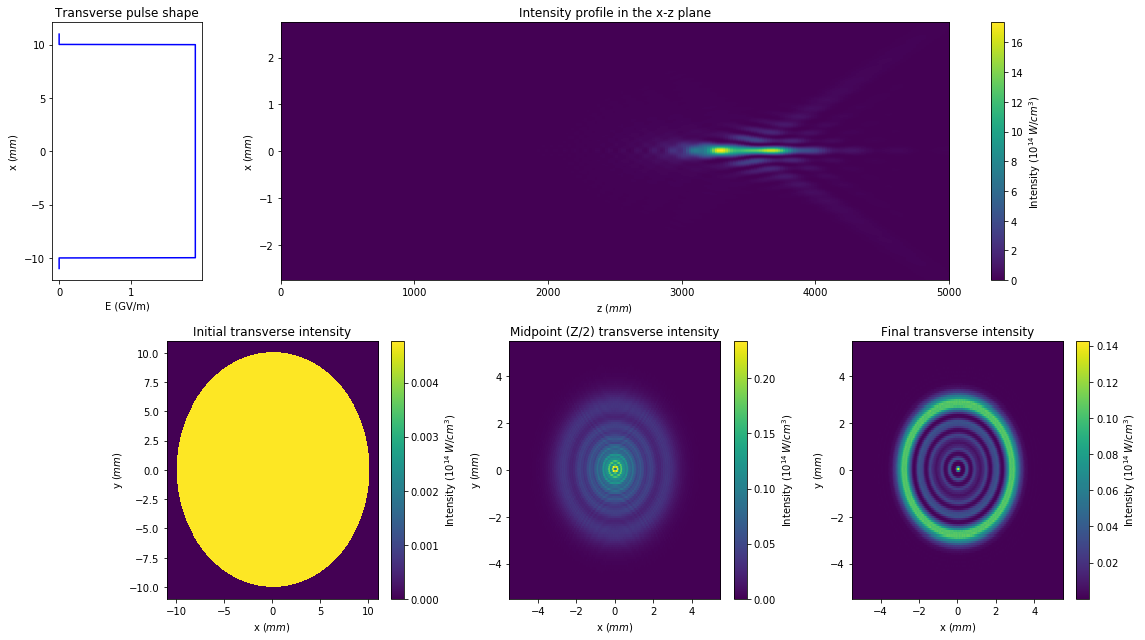

In [14]:
directory = 'Axilens_Test'
params['path'] = path + directory+'/'
# Create the directory if it doesn't exist
if not os.path.exists(params['path']):
    os.makedirs(params['path'])
# Simulate free space propagation
propagation.laser_prop(params, Efunc)
propagation.laser_prop_plot(params['path'])

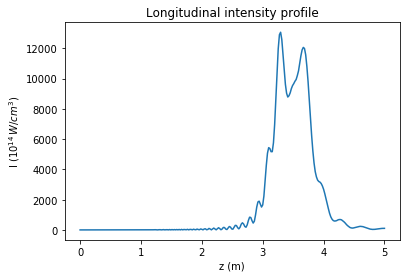

In [15]:
path = params['path']
Eplot = np.load(path+'electricField.npy')
Ei = np.load(path+'inputField.npy')
# Useful simulation parameters
X = params['X']
Y = params['Y']
Z = params['Z']
Nx = params['Nx']
Ny = params['Ny']
Nz = params['Nz']
z = np.linspace(0, Z, Nz)

plt.plot(z/1e6, abs(Eplot[:, int(Nx/2), int(Ny/2)])**2)
plt.xlabel(r'z (m)')
plt.ylabel(r'I ($10^{14}\,W/cm^3$)')
plt.title('Longitudinal intensity profile')
plt.show()

del Eplot
del Ei

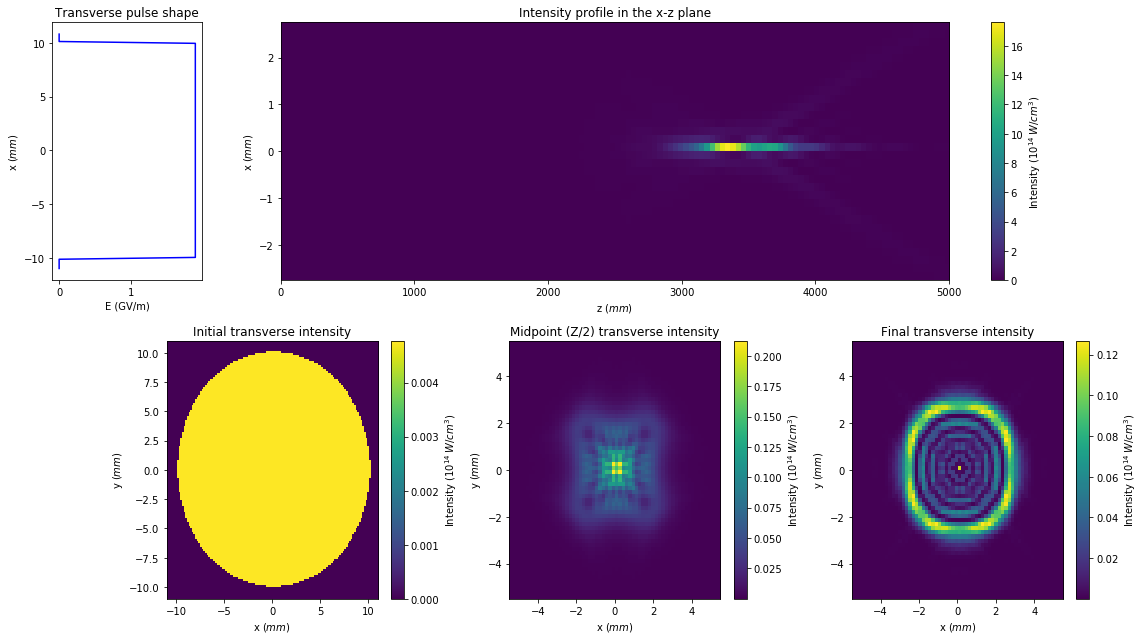

In [2]:
def Efunc(x, y):
    # Input flatop beam
    w0 = 10e3
    r2 = x**2 + y**2
    E0 = np.zeros(np.shape(r2))
    E0[r2 < w0**2] = 1.0
    # Axilens
    R = w0
    f0 = 3e6
    dz = 1e6
    phi = np.pi*R**2/(params['lam']*dz) * np.log(f0+dz*r2/R**2)
    T0 = np.exp(-1j*phi)
    # Initial electric field
    return E0 * T0

# Temporal pulse
def Tfunc(t):
    from ionization import ionization
    tau = 35
    return ionization.gaussian_envelope(0.25, t, tau).real

# Setup the parameters
params = {'Nx' : 2**7,
          'Ny' : 2**7,
          'Nz' : 2**7,
          'Nt' : 2**6,
          'X' : 22e3,
          'Y' : 22e3,
          'Z' : 5e6,
          'T' : 100,
          'n0' : 1.0,
          'E0' : 1.0,
          'alpha' : 0.667,
          'EI' : 13.5984,
          'E0' : ionization.field_from_intensity(.00477),
          'lam' : 0.8,
          'n' : 1.0,
          'nFinal' : True
          }

path = '/media/robert/Data_Storage/'

directory = 'temp'
params['path'] = path + directory+'/'
# Create the directory if it doesn't exist
if not os.path.exists(params['path']):
    os.makedirs(params['path'])
# Simulate free space propagation
propagation.laser_prop(params, Efunc)
propagation.laser_prop_plot(params['path'])